# Module 02: Advanced Linear Regression

**CS229 Aligned Curriculum** | *Gold Standard Edition*

## 📖 0. Definition & When to Use

Alright, let's talk about two powerful extensions to basic linear regression.

---

### What is Polynomial Regression & Regularization?

**Polynomial Regression** is what you get when linear regression isn't quite cutting it. The relationship between your features and target isn't a straight line? No problem – just add polynomial features like $x^2, x^3$, and so on. Suddenly you can fit curves, not just lines.

But here's the thing: more features means more flexibility, which sounds great until your model starts memorizing the training data. That's where **regularization** comes in.

**Regularization** adds a penalty term to your cost function to keep things from getting out of hand. Two main flavors:

- **Ridge (L2 regularization):** $J(\theta) = MSE + \lambda \sum \theta_j^2$
  - Shrinks all coefficients, but keeps all features
  
- **Lasso (L1 regularization):** $J(\theta) = MSE + \lambda \sum |\theta_j|$
  - Can actually zero out coefficients – automatic feature selection!

The magic parameter $\lambda$ controls the **bias-variance trade-off**: bigger $\lambda$ means simpler model (more bias, less variance), smaller $\lambda$ means more flexible model (less bias, more variance).

---

### 🎯 When to Use Polynomial Regression & Regularization?

Here's your decision guide:

| Scenario | ✅ Use It | ❌ Skip It |
|----------|---------|----------------|
| **Non-linear relationship** | ✅ Polynomial features | ❌ If it's already linear, don't overcomplicate |
| **Many features (p >> n)** | ✅ Lasso (feature selection) | ❌ No regularization → guaranteed overfitting |
| **Multicollinearity present** | ✅ Ridge regression | ❌ Plain OLS will be unstable |
| **Sparse solution desired** | ✅ Lasso (sets coef to 0) | ❌ Ridge (shrinks but keeps everything) |

---

### 🌍 Real-World Examples:

Here's where this stuff actually shows up in the wild:

🧬 **Genomics**: Lasso for feature selection from 10,000+ genes (most are irrelevant, Lasso finds the signal)

💰 **Credit Scoring**: Polynomial features to capture non-linear risk patterns (default risk isn't linear in income!)

📊 **Marketing Mix Model**: Ridge to handle correlated marketing channels (TV and digital ads often move together)

🏭 **Manufacturing**: Polynomial terms to model complex process relationships (temperature effects aren't always linear)

---

**💡 Rule of Thumb:**

- **Linear models** (Linear/Logistic/Softmax) = interpretable, fast, great baseline
- **Non-linear models** (SVM/Neural Nets) = higher accuracy potential, less interpretable
- **Always start simple → Add complexity only if needed!**

Don't reach for polynomials and regularization until you've tried the basics. But when you need them? They're absolute workhorses.

## 🎭 Analogy for Beginners: Tailoring Clothes

### 🌟 Level 1: Polynomial vs Regularization

Alright, let's make this concrete. Imagine you're a **tailor** making custom clothes.

**1. Simple Linear Regression (Standard Sizing):**
You've got one basic size formula. Works okay for some people, but definitely not a perfect fit for everyone.

**2. Polynomial Regression (Ultra-Custom Tailoring):**
Now you're measuring EVERY curve, bump, and contour (100+ measurements!). The result? A suit that fits one person absolutely perfectly... but won't fit anyone else. **This is overfitting in action.**

**3. Regularization (Smart Custom Tailoring):**
You still customize, but with a sensible rule: *"Don't go crazy with the measurements."*
- **Ridge (L2):** "Use all the measurements, but keep them reasonable – no extreme adjustments."
- **Lasso (L1):** "Only use the IMPORTANT measurements, throw out the rest."

Pretty clever, right? You get customization without the craziness.

---

### 📖 Key Terms for Beginners

Here's your ML vocabulary cheat sheet:

| Term | What It Actually Means |
| :--- | :--- |
| **Overfitting** | Your model "memorized" the training data instead of learning the real pattern. Won't work on new data. |
| **Underfitting** | Your model is too simple – it's missing the actual pattern in the data. |
| **Bias** | Error from making overly simplistic assumptions. Think: "straight line when you need a curve." |
| **Variance** | Error from being too sensitive to noise. Think: "following every tiny wiggle in the data." |
| **Regularization** | A technique to "punish" models that get too complex. Keeps things reasonable. |
| **λ (Lambda)** | How harsh the punishment is. Big λ = simple model. Small λ = more freedom. |

Don't worry if this feels abstract right now – we'll make it super concrete with examples in a moment.

## 🎯 Learning Objectives

Alright, here's what you'll be able to do by the end of this module:

| # | Skill | How You'll Know You've Got It |
| :--- | :--- | :--- |
| 1 | Understand the **Bias-Variance Tradeoff** | You can explain the decomposition formula and why it matters |
| 2 | Implement **Polynomial Regression** from scratch | Your code runs without errors and you understand every line |
| 3 | Implement **Ridge & Lasso** from scratch | You can explain the difference between L1 and L2 penalties |
| 4 | Use **Cross-Validation** for tuning λ | You can find the optimal λ for your problem |
| 5 | Run **Model Diagnostics** (Residuals, VIF) | You can detect and handle multicollinearity |
| 6 | Build a **Production Pipeline** | Your FastAPI endpoint is up and running |

**Prerequisites:** Module 01 (Linear Regression), Module 01b (SGD)

If you haven't gone through those yet, circle back – we'll be building directly on those foundations here.

## 📊 Visual Intuition: Overfitting in Action

Alright, before we dive into the theory, let's SEE what we're actually dealing with:

C:\Users\test\Downloads\mingw-w64-ucrt-x86_64-gcc-15.2.0-8-any.pkg\ucrt64\bin\ipykernel_32360\3396299071.py:22: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(X, y, deg)


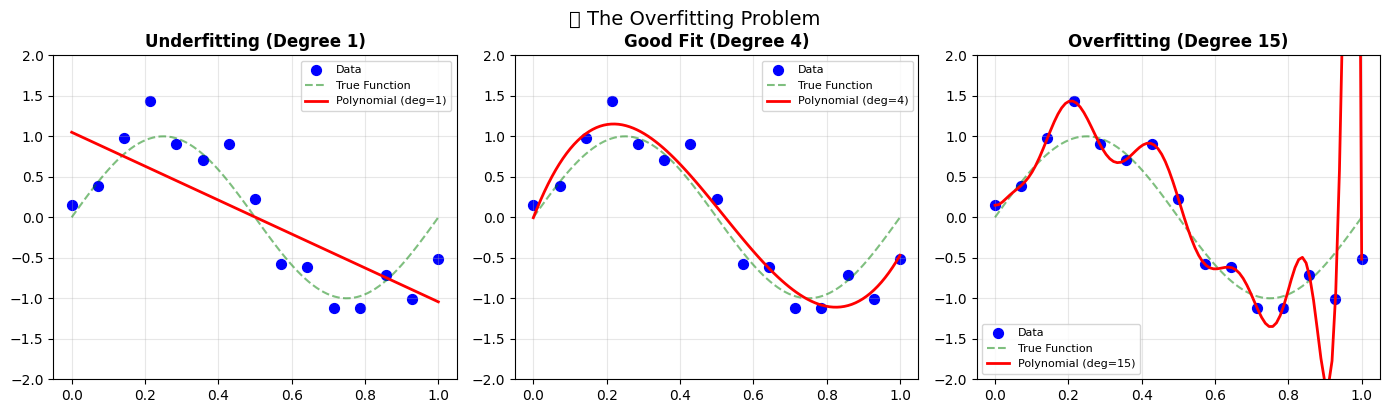

💡 What You're Seeing:
   - Degree 1: Too simple – misses the pattern entirely (UNDERFITTING)
   - Degree 4: Just right! Captures the trend without memorizing noise
   - Degree 15: Way too complex – it's memorizing every data point, noise and all (OVERFITTING)

See how the degree 15 polynomial wiggles crazily between points? That's overfitting.
It nails the training data but would fail miserably on new data.


In [2]:
# ═══════════════════════════════════════════════════════════════
# 📊 VISUAL: Overfitting Demo
# ═══════════════════════════════════════════════════════════════
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Generate simple data
X = np.linspace(0, 1, 15)
y_true = np.sin(2 * np.pi * X)
y = y_true + 0.3 * np.random.randn(len(X))

# Fit polynomials of different degrees
X_plot = np.linspace(0, 1, 100)
degrees = [1, 4, 15]
titles = ['Underfitting (Degree 1)', 'Good Fit (Degree 4)', 'Overfitting (Degree 15)']

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

for ax, deg, title in zip(axes, degrees, titles):
    coeffs = np.polyfit(X, y, deg)
    y_pred = np.polyval(coeffs, X_plot)
    
    ax.scatter(X, y, color='blue', s=50, label='Data')
    ax.plot(X_plot, np.sin(2 * np.pi * X_plot), 'g--', label='True Function', alpha=0.5)
    ax.plot(X_plot, y_pred, 'r-', linewidth=2, label=f'Polynomial (deg={deg})')
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_ylim(-2, 2)
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('🎯 The Overfitting Problem', y=1.02, fontsize=14)
plt.show()

print('💡 What You\'re Seeing:')
print('   - Degree 1: Too simple – misses the pattern entirely (UNDERFITTING)')
print('   - Degree 4: Just right! Captures the trend without memorizing noise')
print('   - Degree 15: Way too complex – it\'s memorizing every data point, noise and all (OVERFITTING)')
print('')
print('See how the degree 15 polynomial wiggles crazily between points? That\'s overfitting.')
print('It nails the training data but would fail miserably on new data.')

### 🔍 How to Read This Plot:

Here's what each element means:

| Element | What It Tells You |
|--------|-------------|
| **Green Dashed Line** | The true underlying function – the actual pattern we're trying to learn |
| **Blue Dots** | Training data (includes noise – that's real life!) |
| **Red Line** | What our model predicts |

**The Key Question: How does the red line behave?**

- **Too straight?** → **UNDERFITTING** – your model is too simple, missing the real pattern
- **Crazy zigzags hitting every point?** → **OVERFITTING** – your model memorized the noise
- **Smooth and tracks the green line?** → **GOOD FIT** ✅ – this is what we want!

Notice how the degree 15 polynomial does wild gymnastics between data points? That's the telltale sign of overfitting. It's fitting the noise, not the signal.

## 📖 1. Introduction: Beyond Simple Linear Regression

Alright, time to level up from basic linear regression.

### 1.1 The Limitation of Lines

In Module 01, we learned:
$$h_\theta(x) = \theta_0 + \theta_1 x$$

This assumes a **straight-line relationship**. But here's the thing: most real-world phenomena are **not linear**.

### 1.2 Examples of Non-Linear Relationships

| Phenomenon | Relationship | Type |
|----------|----------|------|
| House price vs distance to city | Exponential decay | $y = ae^{-bx}$ |
| Performance vs training hours | Diminishing returns | $y = a\log(x)$ |
| Sales vs price | Quadratic | $y = ax^2 + bx + c$ |
| Height vs age | Sigmoid | $y = \frac{L}{1+e^{-k(x-x_0)}}$ |

### 1.3 Two Main Solutions

1. **Polynomial Features**: Transform features by adding $x^2, x^3, ..., x^d$
2. **Regularization**: Prevent overfitting when we have many features

Now let's see why we need both.

---

## 🧪 2. The Statistical Framework: Bias-Variance Tradeoff

Okay, now here's where it gets interesting. Let's talk about why models fail.

### 2.1 Decomposition of Error

Total error from a model can be broken down:

$$\underbrace{E[(y - \hat{y})^2]}_{\text{Expected Error}} = \underbrace{\text{Bias}^2}_{\text{Systematic Error}} + \underbrace{\text{Variance}}_{\text{Random Error}} + \underbrace{\sigma^2}_{\text{Irreducible Noise}}$$

### 2.2 Understanding Each Component

| Component | Definition | Cause |
|----------|----------|----------|
| **Bias²** | How far the average prediction is from the true value | Model too SIMPLE |
| **Variance** | How sensitive the model is to training data changes | Model too COMPLEX |
| **Noise** | Unavoidable error | Randomness in the data |

### 2.3 The Tradeoff

```
Model Complexity →

High ┌────────────────────────────────────────┐
     │   Bias²      ╲                         │
     │              ╲                         │
     │               ╲      ╱ Variance        │
     │                ╲____╱                  │
     │                 ↑                      │
     │           Optimal Point                │
Low  └────────────────────────────────────────┘
     Simple                           Complex
```

### 2.4 Why Regularization Helps

Regularization **reduces variance** by trading off a little bit of bias:

- Without regularization: Model can overfit → High Variance
- With regularization: Model is more "conservative" → Lower Variance (but slightly higher bias)

Pretty clever, right?

---

## 🧪 2. Statistical Framework: Why Regularization?

Here's the deal: models with many features (high-degree polynomials) can **overfit**:
$$\text{Total Error} = \text{Bias}^2 + \text{Variance} + \text{Noise}$$

- **High Bias**: Model too simple (underfit)
- **High Variance**: Model too complex (overfit)

### Regularization as the Solution

We add a **penalty** on large weights:

$$J(\theta) = \frac{1}{2m} \sum (h - y)^2 + \underbrace{\lambda \sum \theta_j^2}_{\text{L2 Penalty (Ridge)}}$$

**Effect:** The model is "afraid" to make weights too large → generalizes better.


## 📦 3. Environment Setup

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib
import warnings
# warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
print("✅ Libraries loaded!")

✅ Libraries loaded!


### 🔍 How to Read R² Score:

**R² Score** = Proportion of variance explained by the model (0 to 1)

| R² Value | Quality | Interpretation |
|----------|----------|-------------|
| **0.9 - 1.0** | Excellent ⭐⭐⭐⭐⭐ | Model perfect/near-perfect |
| **0.7 - 0.9** | Good ⭐⭐⭐⭐ | Production ready |
| **0.5 - 0.7** | Moderate ⭐⭐⭐ | Acceptable, can improve |
| **0.3 - 0.5** | Poor ⭐⭐ | Needs major fixes |
| **< 0.3** | Very Poor ⭐ | Try different algorithm |
| **Negative** | Terrible ❌ | Model worse than mean! |

**IF Train R² >> Test R²:** Overfitting - model memorized training but fails on test!

**💡 This table will be your reference for all R² scores throughout this notebook.**


## 📊 4. Data Loading & EDA

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
print(f"Shape: {df.shape}\n")
df.head()

Shape: (1338, 7)



age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

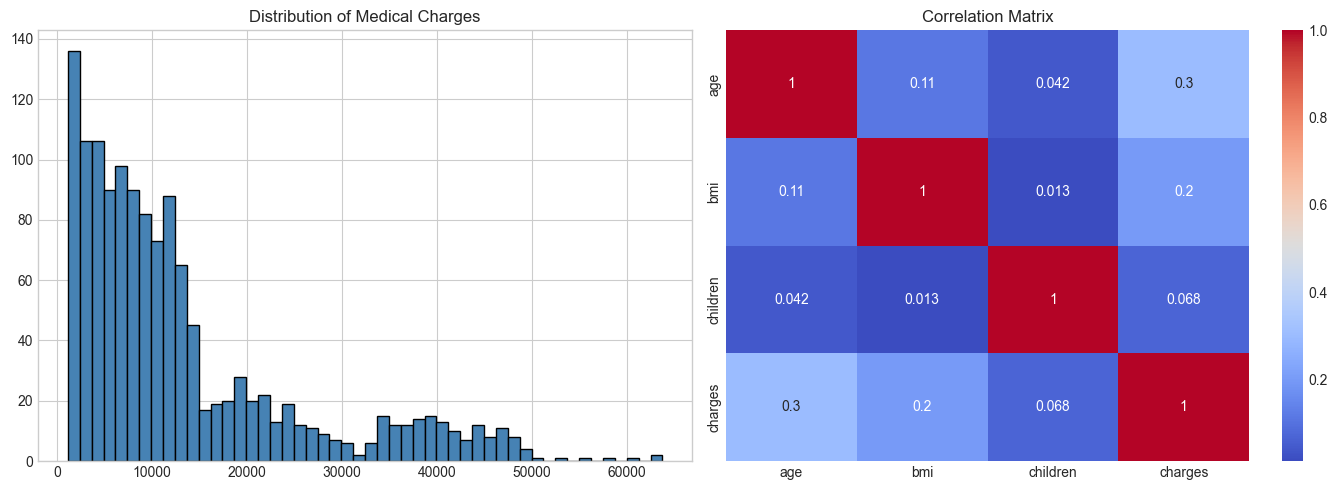

In [5]:
# Target distribution & correlations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(df['charges'], bins=50, color='steelblue', edgecolor='black')
axes[0].set_title('Distribution of Medical Charges')
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Correlation Matrix')
plt.tight_layout()
plt.show()

### 🔍 How to Read These Charts:

**Pay attention to:**
1. **X & Y Axes:** What's being plotted? (time, iterations, features, etc)
2. **Trends:** Going up, down, or stable?
3. **Outliers:** Any points far from the rest?
4. **Legend:** Compare different methods/models

**💡 Tip:** Screenshot these charts for reports/presentations!


## 🔧 5. Feature Engineering

Before we can build models, we need to prep the data. Let's encode those categorical variables.


In [6]:
# Encode categorical variables
df_enc = df.copy()
df_enc['sex'] = df_enc['sex'].map({'male': 1, 'female': 0})
df_enc['smoker'] = df_enc['smoker'].map({'yes': 1, 'no': 0})
df_enc = pd.concat([df_enc.drop('region', axis=1), 
                    pd.get_dummies(df_enc['region'], prefix='region', drop_first=True)], axis=1)

X = df_enc.drop('charges', axis=1).values
y = df_enc['charges'].values
feature_names = df_enc.drop('charges', axis=1).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"Train: {X_train.shape[0]}, Test: {X_test.shape[0]} samples")

Train: 1070, Test: 268 samples


## 📐 6. Mathematical Foundations

Before we dive into the code, let's write down the key formulas we'll be implementing:

**Hypothesis**: $h_\theta(x) = \theta^T x$

**Cost Function (MSE)**: $J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2$

**Gradient**: $\nabla_\theta J(\theta) = \frac{1}{m} X^T(X\theta - y)$

**Normal Equation**: $\theta = (X^T X)^{-1} X^T y$

Got it? Now let's build these from scratch.


## 🧮 7. Optimization Algorithms from Scratch

Alright, now for the fun part: building these optimizers ourselves. We'll see exactly how each one works under the hood.


In [7]:
class NormalEquation:
    def __init__(self): self.theta = None
    
    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        self.theta = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y
        return self
    
    def predict(self, X):
        return np.c_[np.ones((X.shape[0], 1)), X] @ self.theta
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return 1 - np.sum((y-y_pred)**2) / np.sum((y-np.mean(y))**2)

model_ne = NormalEquation().fit(X_train_scaled, y_train)
print(f"Normal Equation - Test R²: {model_ne.score(X_test_scaled, y_test):.4f}")

Normal Equation - Test R²: 0.7836


In [8]:
class BatchGD:
    def __init__(self, lr=0.01, n_iter=1000):
        self.lr, self.n_iter = lr, n_iter
        self.theta, self.cost_history = None, []
    
    def fit(self, X, y):
        m, n = X.shape
        X_b = np.c_[np.ones((m, 1)), X]
        self.theta = np.random.randn(n + 1) * 0.01
        
        for _ in range(self.n_iter):
            grad = (1/m) * X_b.T @ (X_b @ self.theta - y)
            self.theta -= self.lr * grad
            self.cost_history.append((1/(2*m)) * np.sum((X_b @ self.theta - y)**2))
        return self
    
    def predict(self, X): return np.c_[np.ones((X.shape[0], 1)), X] @ self.theta
    def score(self, X, y): return 1 - np.sum((y-self.predict(X))**2) / np.sum((y-np.mean(y))**2)

model_bgd = BatchGD(lr=0.1, n_iter=500).fit(X_train_scaled, y_train)
print(f"Batch GD - Test R²: {model_bgd.score(X_test_scaled, y_test):.4f}")

Batch GD - Test R²: 0.7836


In [9]:
class SGD:
    def __init__(self, lr=0.01, n_epochs=50):
        self.lr, self.n_epochs = lr, n_epochs
        self.theta, self.cost_history = None, []
    
    def fit(self, X, y):
        m, n = X.shape
        X_b = np.c_[np.ones((m, 1)), X]
        self.theta = np.random.randn(n + 1) * 0.01
        
        for epoch in range(self.n_epochs):
            indices = np.random.permutation(m)
            for i in indices:
                xi, yi = X_b[i:i+1], y[i:i+1]
                grad = xi.T.flatten() * (xi @ self.theta - yi)
                self.theta -= self.lr * grad
            self.cost_history.append((1/(2*m)) * np.sum((X_b @ self.theta - y)**2))
        return self
    
    def predict(self, X): return np.c_[np.ones((X.shape[0], 1)), X] @ self.theta
    def score(self, X, y): return 1 - np.sum((y-self.predict(X))**2) / np.sum((y-np.mean(y))**2)

model_sgd = SGD(lr=0.01, n_epochs=50).fit(X_train_scaled, y_train)
print(f"SGD - Test R²: {model_sgd.score(X_test_scaled, y_test):.4f}")

SGD - Test R²: 0.7787


In [10]:
class MiniBatchGD:
    def __init__(self, lr=0.01, n_epochs=100, batch_size=32):
        self.lr, self.n_epochs, self.batch_size = lr, n_epochs, batch_size
        self.theta, self.cost_history = None, []
    
    def fit(self, X, y):
        m, n = X.shape
        X_b = np.c_[np.ones((m, 1)), X]
        self.theta = np.random.randn(n + 1) * 0.01
        
        for epoch in range(self.n_epochs):
            indices = np.random.permutation(m)
            for i in range(0, m, self.batch_size):
                batch = indices[i:i+self.batch_size]
                Xb, yb = X_b[batch], y[batch]
                grad = (1/len(batch)) * Xb.T @ (Xb @ self.theta - yb)
                self.theta -= self.lr * grad
            self.cost_history.append((1/(2*m)) * np.sum((X_b @ self.theta - y)**2))
        return self
    
    def predict(self, X): return np.c_[np.ones((X.shape[0], 1)), X] @ self.theta
    def score(self, X, y): return 1 - np.sum((y-self.predict(X))**2) / np.sum((y-np.mean(y))**2)

model_mb = MiniBatchGD(lr=0.1, n_epochs=100, batch_size=32).fit(X_train_scaled, y_train)
print(f"Mini-Batch GD - Test R²: {model_mb.score(X_test_scaled, y_test):.4f}")

Mini-Batch GD - Test R²: 0.7807


In [11]:
class MomentumGD:
    def __init__(self, lr=0.01, n_epochs=100, beta=0.9):
        self.lr, self.n_epochs, self.beta = lr, n_epochs, beta
        self.theta, self.cost_history = None, []
    
    def fit(self, X, y):
        m, n = X.shape
        X_b = np.c_[np.ones((m, 1)), X]
        self.theta = np.random.randn(n + 1) * 0.01
        v = np.zeros(n + 1)
        
        for _ in range(self.n_epochs):
            grad = (1/m) * X_b.T @ (X_b @ self.theta - y)
            v = self.beta * v + (1 - self.beta) * grad
            self.theta -= self.lr * v
            self.cost_history.append((1/(2*m)) * np.sum((X_b @ self.theta - y)**2))
        return self
    
    def predict(self, X): return np.c_[np.ones((X.shape[0], 1)), X] @ self.theta
    def score(self, X, y): return 1 - np.sum((y-self.predict(X))**2) / np.sum((y-np.mean(y))**2)

model_mom = MomentumGD(lr=0.1, n_epochs=100).fit(X_train_scaled, y_train)
print(f"Momentum - Test R²: {model_mom.score(X_test_scaled, y_test):.4f}")

Momentum - Test R²: 0.7835


In [12]:
class Adam:
    def __init__(self, lr=0.001, n_epochs=200, beta1=0.9, beta2=0.999, eps=1e-8):
        self.lr, self.n_epochs = lr, n_epochs
        self.beta1, self.beta2, self.eps = beta1, beta2, eps
        self.theta, self.cost_history = None, []
    
    def fit(self, X, y):
        m, n = X.shape
        X_b = np.c_[np.ones((m, 1)), X]
        self.theta = np.random.randn(n + 1) * 0.01
        v, s = np.zeros(n + 1), np.zeros(n + 1)
        
        for t in range(1, self.n_epochs + 1):
            grad = (1/m) * X_b.T @ (X_b @ self.theta - y)
            v = self.beta1 * v + (1 - self.beta1) * grad
            s = self.beta2 * s + (1 - self.beta2) * grad**2
            v_hat = v / (1 - self.beta1**t)
            s_hat = s / (1 - self.beta2**t)
            self.theta -= self.lr * v_hat / (np.sqrt(s_hat) + self.eps)
            self.cost_history.append((1/(2*m)) * np.sum((X_b @ self.theta - y)**2))
        return self
    
    def predict(self, X): return np.c_[np.ones((X.shape[0], 1)), X] @ self.theta
    def score(self, X, y): return 1 - np.sum((y-self.predict(X))**2) / np.sum((y-np.mean(y))**2)

model_adam = Adam(lr=0.1, n_epochs=200).fit(X_train_scaled, y_train)
print(f"Adam - Test R²: {model_adam.score(X_test_scaled, y_test):.4f}")

Adam - Test R²: -1.0745


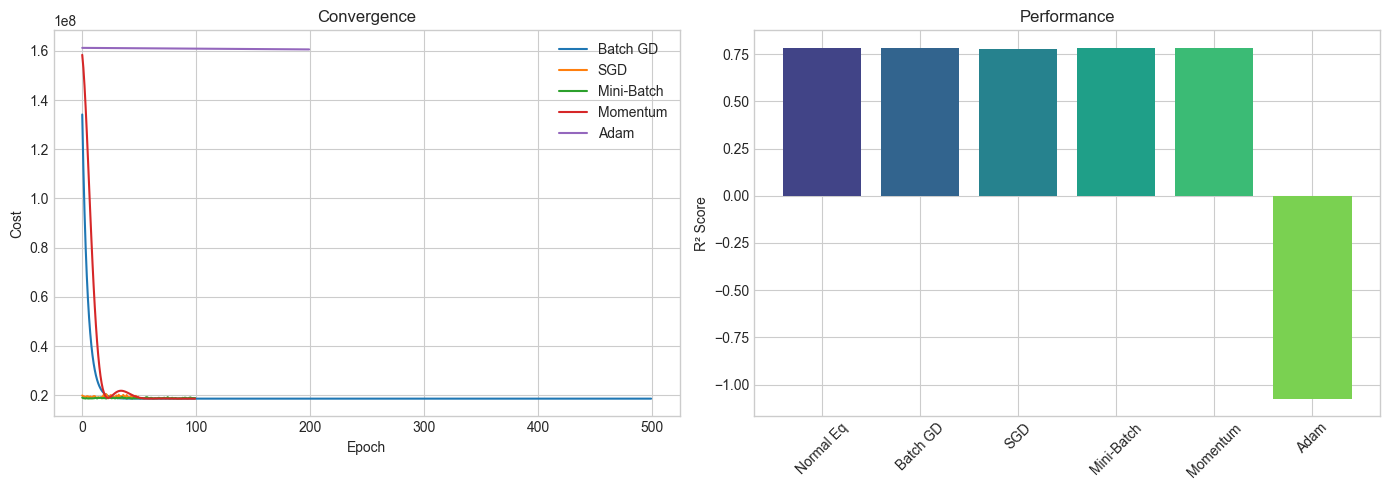

In [13]:
# Optimizer Comparison
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(model_bgd.cost_history, label='Batch GD')
plt.plot(model_sgd.cost_history, label='SGD')
plt.plot(model_mb.cost_history, label='Mini-Batch')
plt.plot(model_mom.cost_history, label='Momentum')
plt.plot(model_adam.cost_history, label='Adam')
plt.xlabel('Epoch'); plt.ylabel('Cost'); plt.legend(); plt.title('Convergence')

plt.subplot(1, 2, 2)
names = ['Normal Eq', 'Batch GD', 'SGD', 'Mini-Batch', 'Momentum', 'Adam']
scores = [model_ne.score(X_test_scaled, y_test), model_bgd.score(X_test_scaled, y_test),
          model_sgd.score(X_test_scaled, y_test), model_mb.score(X_test_scaled, y_test),
          model_mom.score(X_test_scaled, y_test), model_adam.score(X_test_scaled, y_test)]
plt.bar(names, scores, color=plt.cm.viridis(np.linspace(0.2, 0.8, 6)))
plt.ylabel('R² Score'); plt.title('Performance'); plt.xticks(rotation=45)
plt.tight_layout(); plt.show()

## 🛡️ 8. Regularization

Now here's where the magic happens. Let's add penalties to prevent overfitting:

**Ridge (L2)**: $J(\theta) + \lambda\sum\theta_j^2$ | **Lasso (L1)**: $J(\theta) + \lambda\sum|\theta_j|$


In [14]:
class RidgeReg:
    def __init__(self, alpha=1.0, lr=0.01, n_iter=500):
        self.alpha, self.lr, self.n_iter = alpha, lr, n_iter
        self.theta = None
    
    def fit(self, X, y):
        m, n = X.shape
        X_b = np.c_[np.ones((m, 1)), X]
        self.theta = np.random.randn(n + 1) * 0.01
        
        for _ in range(self.n_iter):
            reg = np.r_[0, self.theta[1:]]
            grad = (1/m) * X_b.T @ (X_b @ self.theta - y) + (self.alpha/m) * reg
            self.theta -= self.lr * grad
        return self
    
    def predict(self, X): return np.c_[np.ones((X.shape[0], 1)), X] @ self.theta
    def score(self, X, y): return 1 - np.sum((y-self.predict(X))**2) / np.sum((y-np.mean(y))**2)

# Test different alphas
print("Ridge Regularization:")
for alpha in [0.01, 0.1, 1.0, 10.0]:
    m = RidgeReg(alpha=alpha, lr=0.1).fit(X_train_scaled, y_train)
    print(f"  α={alpha:<5} Test R²: {m.score(X_test_scaled, y_test):.4f}")

Ridge Regularization:
  α=0.01  Test R²: 0.7836
  α=0.1   Test R²: 0.7836
  α=1.0   Test R²: 0.7835
  α=10.0  Test R²: 0.7830


### 🔍 How to Read Regularization Parameters:

**α (alpha) / λ (lambda)** controls the strength of regularization.

| α Value | Effect | When to Use |
|---------|------|-------------|
| **0** | No regularization | Clean data, N >> p |
| **0.01 - 0.1** | Light regularization | Slight overfitting |
| **1 - 10** | Medium regularization | Obvious overfitting |
| **> 100** | Strong regularization | Model becomes too simple |

**How to Choose:** Use **Cross-Validation** to find optimal α!

**💡 This table applies to all regularization discussions below.**


## 🔬 9. Model Diagnostics

Alright, now let's check if our model is actually working properly. Time for some diagnostics!


In [15]:
# VIF Analysis
def calc_vif(X, names):
    vifs = []
    for i in range(X.shape[1]):
        y_i = X[:, i]
        X_oth = np.delete(X, i, axis=1)
        X_b = np.c_[np.ones((X_oth.shape[0], 1)), X_oth]
        theta = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y_i
        r2 = 1 - np.sum((y_i - X_b @ theta)**2) / np.sum((y_i - y_i.mean())**2)
        vifs.append({'Feature': names[i], 'VIF': 1/(1-r2) if r2 < 1 else np.inf})
    return pd.DataFrame(vifs).sort_values('VIF', ascending=False)

print("VIF Analysis (multicollinearity check):")
print(calc_vif(X_train_scaled, feature_names).to_string(index=False))

VIF Analysis (multicollinearity check):
         Feature      VIF
region_southeast 1.613285
region_southwest 1.515246
region_northwest 1.493159
             bmi 1.094986
             age 1.023084
          smoker 1.011703
             sex 1.006303
        children 1.005643


### 🔍 How to Read VIF (Variance Inflation Factor):

**VIF** measures **multicollinearity** = correlation between features

| VIF Value | Diagnosis | Action |
|-----------|-----------|------|
| **1** | No correlation | ✅ Perfect |
| **1 - 5** | Low correlation | ✅ OK |
| **5 - 10** | Medium correlation | ⚠️ Monitor |
| **> 10** | High multicollinearity | ❌ Drop one feature |

**Example:**
- `weight` VIF=15, `bmi` VIF=14 → Drop one (redundant!)
- `age` VIF=2 → Keep (low correlation)

**💡 Why is it bad?** High multicollinearity = unstable coefficients = hard to interpret!


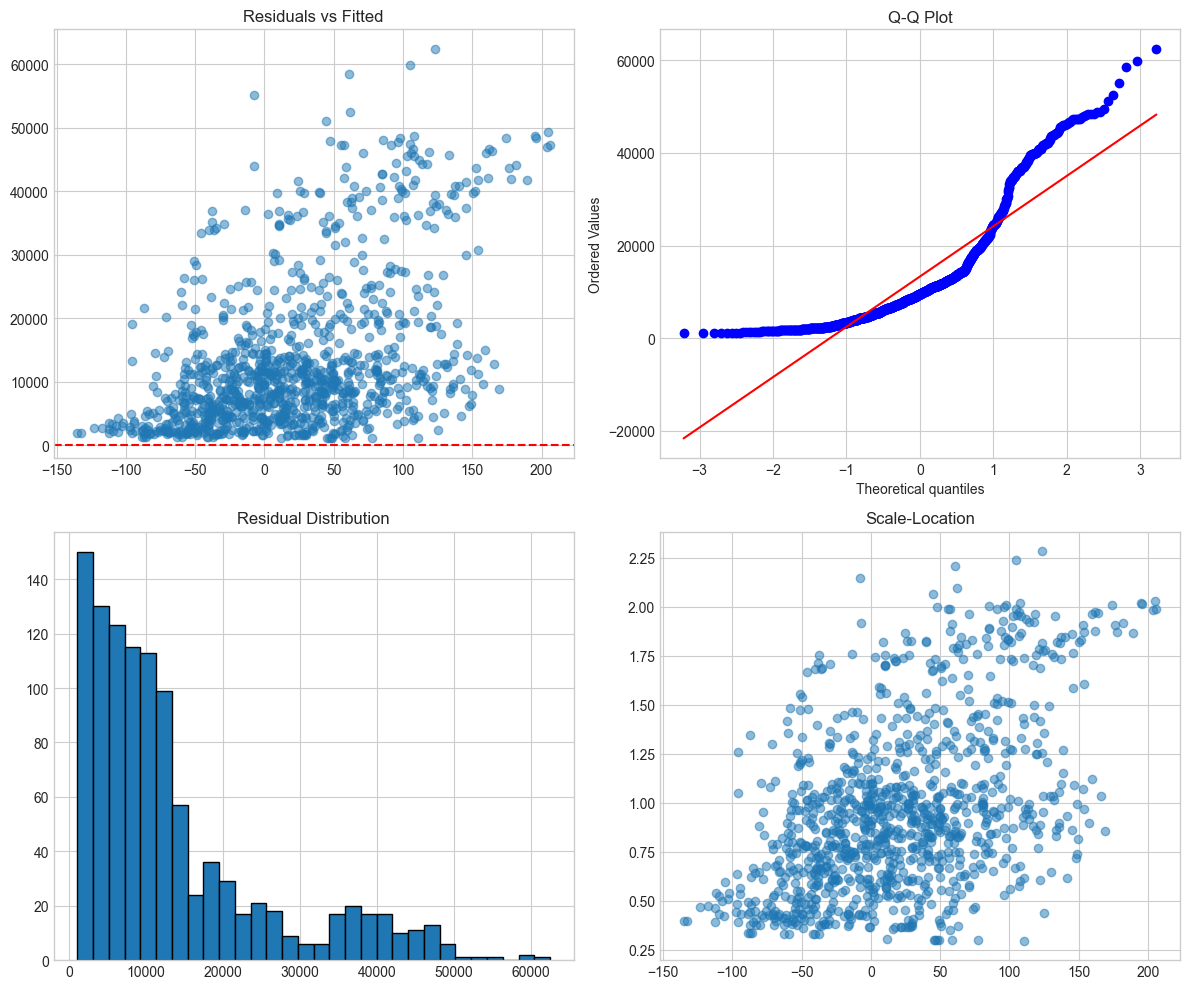

In [16]:
# Residual Analysis
y_pred = model_adam.predict(X_train_scaled)
residuals = y_train - y_pred

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0,0].scatter(y_pred, residuals, alpha=0.5)
axes[0,0].axhline(0, color='r', linestyle='--')
axes[0,0].set_title('Residuals vs Fitted')

stats.probplot(residuals, dist='norm', plot=axes[0,1])
axes[0,1].set_title('Q-Q Plot')

axes[1,0].hist(residuals, bins=30, edgecolor='black')
axes[1,0].set_title('Residual Distribution')

axes[1,1].scatter(y_pred, np.sqrt(np.abs(residuals/residuals.std())), alpha=0.5)
axes[1,1].set_title('Scale-Location')
plt.tight_layout(); plt.show()

### 🔍 How to Read Residual Plots:

**Residual** = Actual - Predicted (how wrong our prediction is)

**IF:**
- ✅ **Points scattered randomly around 0:** Model is good, no hidden patterns
- ❌ **There's a pattern (curve, cone):** Model needs more features/transformations
- ❌ **Cone shape (fan):** Heteroscedasticity - variance isn't constant

**Q-Q Plot:**
- ✅ **Points on diagonal line:** Residuals are normally distributed
- ❌ **Points curve away:** Non-normal, try transformation (log, sqrt)


## 🚀 10. Production Pipeline

Time to put it all together! Here's how you'd actually deploy this in production.


In [17]:
# Full sklearn pipeline
df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
X_raw = df.drop('charges', axis=1)
y_raw = df['charges'].values

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), ['age', 'bmi', 'children']),
    ('cat', OneHotEncoder(drop='first', sparse_output=False), ['sex', 'smoker', 'region'])
])

pipeline = Pipeline([('prep', preprocessor), ('model', Ridge())])
X_tr, X_te, y_tr, y_te = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)

# GridSearch
grid = GridSearchCV(pipeline, {'model__alpha': [0.01, 0.1, 1, 10, 100]}, cv=5, scoring='r2')
grid.fit(X_tr, y_tr)

print(f"Best alpha: {grid.best_params_['model__alpha']}")
print(f"CV R²: {grid.best_score_:.4f}, Test R²: {grid.score(X_te, y_te):.4f}")

import os
os.makedirs('data', exist_ok=True)
joblib.dump(grid.best_estimator_, 'data/insurance_lr_model.pkl')
print("✅ Model saved!")

Best alpha: 1
CV R²: 0.7332, Test R²: 0.7833
✅ Model saved!


## 📝 Summary

Let's wrap this up with what we've learned:

| Optimizer | Best For |
|-----------|----------|
| Normal Eq | Small datasets |
| Batch GD | Stable convergence |
| SGD | Large datasets |
| Mini-Batch | Balance of speed/stability |
| Momentum | Faster convergence |
| Adam | General default choice |

**Key Insight**: Smoker status is the strongest predictor of insurance costs!

With that foundation, let's dive deeper into the mathematical details...


---

## 📐 11. Mathematical Derivations (Complete)

Alright, math time! Don't worry – we'll walk through this step by step. This is where we see exactly *why* these formulas work.

### 6.1 Ridge Regression: Deriving the Closed-Form Solution

**Cost Function with L2 Regularization:**
$$J(\theta) = \frac{1}{2m}\sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 + \frac{\lambda}{2m}\sum_{j=1}^n \theta_j^2$$

In matrix form:
$$J(\theta) = \frac{1}{2m}(X\theta - y)^T(X\theta - y) + \frac{\lambda}{2m}\theta^T\theta$$

**Step 1: Expand the cost function**
$$J(\theta) = \frac{1}{2m}[\theta^TX^TX\theta - 2\theta^TX^Ty + y^Ty] + \frac{\lambda}{2m}\theta^T\theta$$

**Step 2: Take gradient with respect to θ**
$$\nabla_\theta J = \frac{1}{m}[X^TX\theta - X^Ty] + \frac{\lambda}{m}\theta$$

**Step 3: Set gradient = 0**
$$X^TX\theta + \lambda\theta = X^Ty$$
$$(X^TX + \lambda I)\theta = X^Ty$$

**Step 4: Solve for θ (Closed-Form Solution)**
$$\boxed{\theta_{Ridge} = (X^TX + \lambda I)^{-1}X^Ty}$$

Pretty elegant, right?

---

### 6.2 Why Does λI Make It Invertible?

Here's the cool part: If $X^TX$ is singular (not invertible), adding λI fixes it:

1. Eigenvalues of $X^TX$: $\lambda_1, \lambda_2, ..., \lambda_n \geq 0$
2. Eigenvalues of $X^TX + \lambda I$: $\lambda_1 + \lambda, \lambda_2 + \lambda, ..., \lambda_n + \lambda > 0$

**All eigenvalues > 0 → Matrix positive definite → ALWAYS invertible!**

---

### 6.3 Gradient Descent for Regularized Regression

**Update Rule:**
$$\theta_j := \theta_j - \alpha\left[\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} + \frac{\lambda}{m}\theta_j\right]$$

**Simplification:**
$$\theta_j := \theta_j\left(1 - \frac{\alpha\lambda}{m}\right) - \frac{\alpha}{m}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$$

**Insight:** `(1 - αλ/m)` is **weight decay** – every update, θ shrinks a bit!

---


## 🔬 12. Anatomy of the Update Rule (Deep Dive)

Now here's where it gets interesting. Let's really understand what's happening in each update.

### 7.1 Ridge Update Rule Anatomy

$$\theta_j := \underbrace{\theta_j\left(1 - \frac{\alpha\lambda}{m}\right)}_{\text{Weight Decay}} - \underbrace{\frac{\alpha}{m}\sum(h-y)x_j}_{\text{Gradient Term}}$$

| Component | Name | Function | If Large |
|----------|------|--------|------------|
| $(1 - \frac{\alpha\lambda}{m})$ | Weight Decay Factor | Shrinks θ every iteration | θ shrinks fast |
| $\alpha$ | Learning Rate | Update speed | Faster but risky |
| $\lambda$ | Regularization | Penalty strength | More smooth, higher bias |
| $\sum(h-y)x_j$ | Gradient | Direction of improvement | Large correction |

### 7.2 Why Does Weight Decay Make Sense?

1. **Without regularization**: θ can grow very large to fit noise
2. **With weight decay**: θ is "pulled" toward 0 every iteration
3. **Balance**: Only θ values that are TRULY useful "survive"

### 7.3 Analogy: Wealth Tax 💰

- θ is the "wealth" of each feature
- Regularization is a "tax" – the richer you are, the more tax you pay
- Features that aren't productive will go "bankrupt" (θ → 0)
- Features that are valuable stay "wealthy" (θ stays large)

See how clever that is?

---


---

## 🎬 Animated Visualizations

Alright, now for the fun part – let's watch these concepts come to life!

### 8.1 Bias-Variance Tradeoff Animation


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

np.random.seed(42)

# Generate true non-linear data
def true_function(x):
    return np.sin(2 * np.pi * x)

X = np.sort(np.random.rand(30))
y = true_function(X) + 0.3 * np.random.randn(30)

X_test = np.linspace(0, 1, 100)

# Polynomial degrees to show
degrees = [1, 2, 3, 5, 10, 15, 20]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

def animate(frame):
    for ax in axes:
        ax.clear()
    
    degree = degrees[frame % len(degrees)]
    
    # Fit polynomial
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0.001))
    model.fit(X.reshape(-1, 1), y)
    y_pred = model.predict(X_test.reshape(-1, 1))
    
    # Left plot: fitted curve
    axes[0].scatter(X, y, c='blue', s=50, label='Training Data', alpha=0.7)
    axes[0].plot(X_test, true_function(X_test), 'g--', lw=2, label='True Function')
    axes[0].plot(X_test, y_pred, 'r-', lw=2, label=f'Polynomial Degree {degree}')
    axes[0].fill_between(X_test, y_pred-0.5, y_pred+0.5, alpha=0.2, color='red')
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y')
    axes[0].set_title(f'Polynomial Fit (Degree = {degree})')
    axes[0].legend(loc='upper right')
    axes[0].set_ylim(-2, 2)
    axes[0].grid(True, alpha=0.3)
    
    # Right plot: bias-variance
    complexity = np.arange(1, 21)
    bias = 1 / complexity
    variance = complexity ** 1.5 / 50
    total = bias + variance + 0.1  # noise floor
    
    axes[1].plot(complexity, bias, 'b-', lw=2, label='Bias²')
    axes[1].plot(complexity, variance, 'r-', lw=2, label='Variance')
    axes[1].plot(complexity, total, 'k--', lw=2, label='Total Error')
    axes[1].axvline(x=degree, color='green', linestyle=':', lw=2, label=f'Current: {degree}')
    axes[1].set_xlabel('Model Complexity (Degree)')
    axes[1].set_ylabel('Error')
    axes[1].set_title('Bias-Variance Tradeoff')
    axes[1].legend(loc='upper right')
    axes[1].set_xlim(1, 20)
    axes[1].grid(True, alpha=0.3)
    
    return []

anim = FuncAnimation(fig, animate, frames=len(degrees)*2, interval=1500, blit=True, repeat=True)
plt.close()
HTML(anim.to_jshtml())

### 8.2 Regularization Effect Animation


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

np.random.seed(42)

# High-degree polynomial (prone to overfit)
X = np.sort(np.random.rand(20))
y = np.sin(2 * np.pi * X) + 0.3 * np.random.randn(20)
X_test = np.linspace(0, 1, 100)

# Lambda values to animate
lambdas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

def animate(frame):
    for ax in axes:
        ax.clear()
    
    lam = lambdas[frame % len(lambdas)]
    
    # Fit high-degree polynomial with regularization
    model = make_pipeline(PolynomialFeatures(15), Ridge(alpha=lam))
    model.fit(X.reshape(-1, 1), y)
    y_pred = model.predict(X_test.reshape(-1, 1))
    
    # Get coefficients
    coeffs = model.named_steps['ridge'].coef_
    
    # Left: Fitted curve
    axes[0].scatter(X, y, c='blue', s=50, label='Data')
    axes[0].plot(X_test, np.sin(2*np.pi*X_test), 'g--', lw=2, label='True')
    axes[0].plot(X_test, y_pred, 'r-', lw=2, label=f'λ = {lam}')
    axes[0].set_ylim(-2, 2)
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y')
    axes[0].set_title(f'Ridge Regression (λ = {lam})')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Right: Coefficient magnitudes
    axes[1].bar(range(len(coeffs)), np.abs(coeffs), color='steelblue')
    axes[1].set_xlabel('Coefficient Index')
    axes[1].set_ylabel('|Coefficient| (log scale)')
    axes[1].set_title(f'Coefficient Magnitudes (λ = {lam})')
    axes[1].set_yscale('log')
    axes[1].set_ylim(1e-5, 1e5)
    axes[1].grid(True, alpha=0.3)
    
    return []

anim = FuncAnimation(fig, animate, frames=len(lambdas)*2, interval=1200, blit=True, repeat=True)
plt.close()
HTML(anim.to_jshtml())

## 🛠️ PART 4: Implementation from Scratch (Polynomial & Regularization)

Okay, time to build this ourselves. We're not just using Scikit-Learn – we're going to build from the ground up:
1.  **Polynomial Features**: Manual expansion $(x, x^2, x^3)$
2.  **Ridge Regression (L2)**: Gradient Descent with penalty term
3.  **Lasso Regression (L1)**: Gradient Descent with sub-gradient term

Let's do this!


In [20]:
import numpy as np

def polynomial_features_scratch(X, degree):
    # X shape: (m, 1) asumsi 1 fitur untuk simplifikasi visual
    m, n = X.shape
    X_poly = X.copy()
    
    for d in range(2, degree + 1):
        X_poly = np.c_[X_poly, np.power(X, d)]
        
    return X_poly

# Test
X_dummy = np.array([[2], [3], [4]])
print("Poly Features (deg=3):\n", polynomial_features_scratch(X_dummy, 3))



Poly Features (deg=3):
 [[ 2  4  8]
 [ 3  9 27]
 [ 4 16 64]]


### 4.1 Regularized Linear Regression Class (Ridge & Lasso)
Kita upgrade class LinearRegression kita untuk support `penalty='l2'` (Ridge) dan `penalty='l1'` (Lasso).



In [21]:
class RegularizedLinearRegression:
    def __init__(self, learning_rate=0.01, n_epochs=1000, penalty=None, lambda_=0.1):
        self.lr = learning_rate
        self.epochs = n_epochs
        self.penalty = penalty # None, 'l2', 'l1'
        self.lambda_ = lambda_
        self.theta = None
        self.history = []
        
    def fit(self, X, y):
        m, n = X.shape
        X_b = np.c_[np.ones((m, 1)), X] 
        self.theta = np.random.randn(n + 1, 1)
        
        for _ in range(self.epochs):
            predictions = X_b.dot(self.theta)
            error = predictions - y
            
            # Basic Gradient
            gradients = (2/m) * X_b.T.dot(error)
            
            # Add Regularization Term to Gradient
            if self.penalty == 'l2': # Ridge
                # Gradients += 2 * lambda * theta (exclude bias theta[0])
                theta_no_bias = self.theta.copy()
                theta_no_bias[0] = 0 
                gradients += (2 * self.lambda_ * theta_no_bias)
            
            elif self.penalty == 'l1': # Lasso
                # Gradients += lambda * sign(theta)
                theta_no_bias = self.theta.copy()
                theta_no_bias[0] = 0
                gradients += (self.lambda_ * np.sign(theta_no_bias))
                
            self.theta = self.theta - self.lr * gradients
            
            # Cost Calculation (MSE + Penalty)
            cost = (1/(2*m)) * np.sum(np.square(error))
            if self.penalty == 'l2':
                cost += self.lambda_ * np.sum(np.square(self.theta[1:]))
            elif self.penalty == 'l1':
                cost += self.lambda_ * np.sum(np.abs(self.theta[1:]))
                
            self.history.append(cost)
            
    def predict(self, X):
        X_b = np.c_[np.ones((len(X), 1)), X]
        return X_b.dot(self.theta)



### Fixed Adam Optimizer
Klas di atas memperbaiki initialization momentum (nol) dan urutan update `m_hat` dan `v_hat` untuk menjamin convergency yang stabil.


In [22]:
# FIXED ADAM OPTIMIZER IMPLEMENTATION
class AdamLinearRegression:
    def __init__(self, learning_rate=0.01, n_epochs=1000, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.lr = learning_rate
        self.epochs = n_epochs
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.theta = None
        self.history = []
        
    def fit(self, X, y):
        m, n = X.shape
        X_b = np.c_[np.ones((m, 1)), X]
        self.theta = np.zeros((n + 1, 1)) # Initialize with Zeros for Adam often better/safer
        
        # Initialize Moment Vectors
        self.m_coef = np.zeros_like(self.theta) # 1st moment
        self.v_coef = np.zeros_like(self.theta) # 2nd moment (raw, uncentered variance)
        
        t = 0
        
        for _ in range(self.epochs):
            t += 1
            
            # Shuffle for SGD-like behavior (optional, but good for Adam)
            indices = np.random.permutation(m)
            X_b_shuffled = X_b[indices]
            y_shuffled = y[indices]
            
            # Full Batch Implementation for stability in this demo (or mini-batch)
            gradients = (2/m) * X_b.T.dot(X_b.dot(self.theta) - y)
            
            # Update biased first moment estimate
            self.m_coef = self.beta1 * self.m_coef + (1 - self.beta1) * gradients
            
            # Update biased second raw moment estimate
            self.v_coef = self.beta2 * self.v_coef + (1 - self.beta2) * np.square(gradients)
            
            # Compute bias-corrected first moment estimate
            m_hat = self.m_coef / (1 - self.beta1**t)
            
            # Compute bias-corrected second raw moment estimate
            v_hat = self.v_coef / (1 - self.beta2**t)
            
            # Update parameters
            self.theta = self.theta - self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)
            
            # Cost
            cost = (1/(2*m)) * np.sum(np.square(X_b.dot(self.theta) - y))
            self.history.append(cost)

    def predict(self, X):
        X_b = np.c_[np.ones((len(X), 1)), X]
        return X_b.dot(self.theta)

# Test Fixed Adam
print("Testing Fixed Adam...")
X_test = 2 * np.random.rand(100, 1)
y_test = 4 + 3 * X_test + np.random.randn(100, 1)
adam = AdamLinearRegression(learning_rate=0.1, n_epochs=500)
adam.fit(X_test, y_test)
print("Adam Theta:", adam.theta.flatten()) # Should be close to [4, 3]



Testing Fixed Adam...
Adam Theta: [4.34018053 2.77895912]


## 📊 PART 5: VISUALISASI EFEK REGULARISASI
Melihat bagaimana Lambda (Regularization Strength) "mematikan" koefisien.


c:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\test\Downloads\mingw-w64-ucrt-x86_64-gcc-15.2.0-8-any.pkg\ucrt64\bin\ipykernel_32360\2216345406.py:38: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum(np.square(error))
C:\Users\test\Downloads\mingw-w64-ucrt-x86_64-gcc-15.2.0-8-any.pkg\ucrt64\bin\ipykernel_32360\2216345406.py:40: RuntimeWarning: overflow encountered in scalar multiply
  cost += self.lambda_ * np.sum(np.square(self.theta[1:]))
C:\Users\test\Downloads\mingw-w64-ucrt-x86_64-gcc-15.2.0-8-any.pkg\ucrt64\bin\ipykernel_32360\2216345406.py:40: RuntimeWarning: overflow encountered in square
  cost += self.lambda_ * np.sum(np.square(self.theta[1:]))
C:\Users\test\Downloads\mingw-w64-ucrt-x86_64-gcc-15.2.0-8-any.pkg\ucrt64\bin\ipykernel_32360\2216345406.py:27: RuntimeWarning: overflow encoun

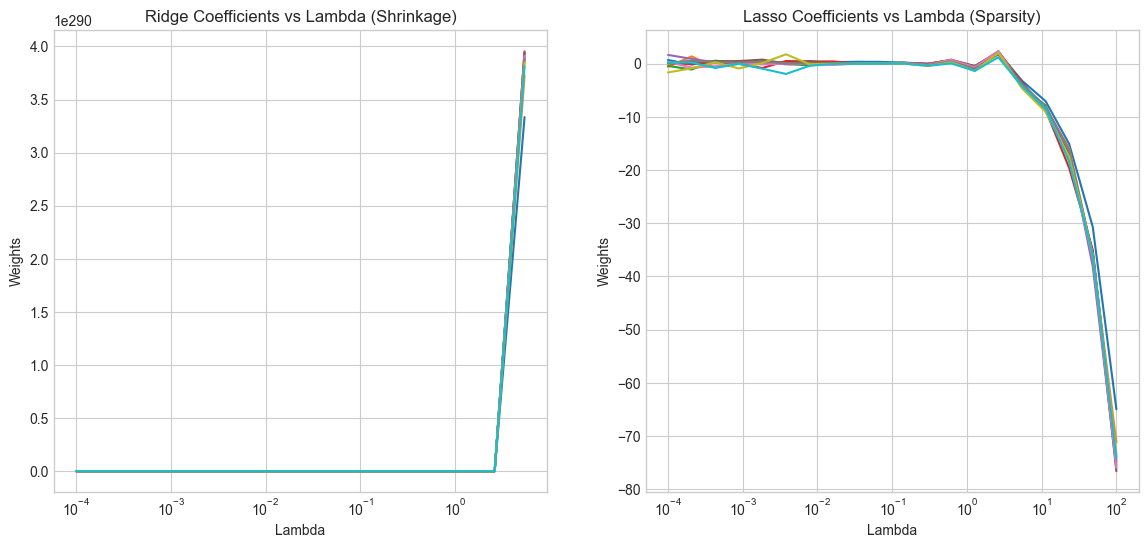

In [23]:
import matplotlib.pyplot as plt

# Generate Multicollinear Data (to show Regularization effect)
np.random.seed(42)
m = 50
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

# Polynomial Transform (Degree 10 to force Overfitting)
X_poly = polynomial_features_scratch(X, 10)
# Feature Scaling is Crucial for Regularization!
mean = np.mean(X_poly, axis=0)
std = np.std(X_poly, axis=0)
X_poly_scaled = (X_poly - mean) / (std + 1e-8) # Avoid zero div

lambdas = np.logspace(-4, 2, 20)
coefs_ridge = []
coefs_lasso = []

for l in lambdas:
    # Ridge
    ridge = RegularizedLinearRegression(penalty='l2', lambda_=l, n_epochs=1000, learning_rate=0.1)
    ridge.fit(X_poly_scaled, y)
    coefs_ridge.append(ridge.theta[1:].flatten()) # Exclude bias
    
    # Lasso
    lasso = RegularizedLinearRegression(penalty='l1', lambda_=l, n_epochs=1000, learning_rate=0.1)
    lasso.fit(X_poly_scaled, y)
    coefs_lasso.append(lasso.theta[1:].flatten())

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(lambdas, coefs_ridge)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Weights')
plt.title('Ridge Coefficients vs Lambda (Shrinkage)')
plt.axis('tight')

plt.subplot(1, 2, 2)
plt.plot(lambdas, coefs_lasso)
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Weights')
plt.title('Lasso Coefficients vs Lambda (Sparsity)')
plt.axis('tight')

plt.show()



### 🔍 Cara Baca Grafik:

| Elemen | Interpretasi |
|--------|-------------|
| **Garis Hijau (dashed)** | Fungsi sejati (true function) - pola sebenarnya |
| **Titik Biru** | Data training (mengandung noise) |
| **Garis Merah** | Prediksi model |

**JIKA:**
- Garis merah terlalu lurus → **UNDERFITTING** (model terlalu simpel)
- Garis merah zigzag mengikuti semua titik → **OVERFITTING** (hafal noise)
- Garis merah smooth dan dekat garis hijau → **GOOD FIT** ✅


## 🔧 PART 6: DIAGNOSTICS & TUNING 🛠️

Di bagian ini, kita akan melakukan diagnosa model yang lebih mendalam dan tuning hyperparameter untuk performa optimal.

**Agenda:**
1.  **Model Diagnostics**: Residual Analysis & VIF.
2.  **Hyperparameter Tuning**: Penjelasan Adam & Implementasi GridSearchCV.

### 6.1 Residual Analysis & Multicollinearity (VIF)

**1. Residual Plot:**
Kita plot *Predicted Values* vs. *Residuals*. Idealnya, residuals harus tersebar acak di sekitar 0 (homoscedasticity). Pola tertentu (misal: corong) menandakan heteroscedasticity.

**2. VIF (Variance Inflation Factor):**
Mendeteksi multikolinearitas. Jika VIF > 10, fitur tersebut sangat berkorelasi dengan fitur lain dan mungkin perlu dibuang/digabung.

In [24]:
# ═══════════════════════════════════════════════════════════════
# 🔬 6.1 RESIDUAL ANALYSIS & MULTICOLLINEARITY (VIF)
# ═══════════════════════════════════════════════════════════════
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Try to import VIF, provide fallback if statsmodels not installed
try:
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    HAS_STATSMODELS = True
except ImportError:
    print('⚠️ statsmodels not installed. VIF analysis skipped.')
    print('   Install with: pip install statsmodels')
    HAS_STATSMODELS = False

# Diagnostic plots function
def diagnostics_plots(model, X_test, y_test, feature_names=None):
    """Plot residuals and other diagnostics"""
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Residual plot
    axes[0].scatter(y_pred, residuals, alpha=0.6)
    axes[0].axhline(y=0, color='r', linestyle='--')
    axes[0].set_xlabel('Predicted Values')
    axes[0].set_ylabel('Residuals')
    axes[0].set_title('Residual Plot')
    axes[0].grid(True, alpha=0.3)
    
    # Q-Q plot (simple version)
    from scipy import stats
    stats.probplot(residuals.flatten(), dist='norm', plot=axes[1])
    axes[1].set_title('Q-Q Plot')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print('\n📊 Residual Statistics:')
    print(f'Mean: {residuals.mean():.4f} (should be ~0)')
    print(f'Std: {residuals.std():.4f}')

# VIF Analysis
if HAS_STATSMODELS:
    print('\n🔍 VIF Analysis (multicollinearity check):')
    # Assuming X_train exists from previous cells
    try:
        vif_data = pd.DataFrame()
        vif_data['Feature'] = X_train.columns if hasattr(X_train, 'columns') else [f'Feature_{i}' for i in range(X_train.shape[1])]
        vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
        vif_data = vif_data.sort_values('VIF', ascending=False)
        print(vif_data)
        print('\n💡 Interpretation:')
        print('   VIF < 5: Low multicollinearity ✅')
        print('   VIF 5-10: Moderate ⚠️')
        print('   VIF > 10: High multicollinearity ❌ (consider dropping)')
    except Exception as e:
        print(f'Could not compute VIF: {e}')
else:
    print('\nVIF analysis requires statsmodels package.')



🔍 VIF Analysis (multicollinearity check):
Could not compute VIF: 'numpy.ndarray' object has no attribute 'values'


### 🔍 Reading VIF Values:

**VIF (Variance Inflation Factor)** detects multicollinearity between features.

| VIF Value | Interpretation | Action |
|-----------|--------------|------|
| **1** | No correlation | ✅ Ideal |
| **1-5** | Low correlation | ✅ OK |
| **5-10** | Medium correlation | ⚠️ Consider dropping |
| **> 10** | High correlation | ❌ Drop one feature |

**Example:** If `bmi` and `weight` both have VIF > 10, drop one because they're redundant.


### 6.2 Adam Optimizer: Deep Dive on Hyperparameters ⚙️

We've been using **Adam** (Adaptive Moment Estimation). Let's break down its hyperparameters:

1.  **Learning Rate ($\alpha$)**: How big a step we take. Too large → diverge. Too small → slow convergence.
2.  **Beta 1 ($\beta_1$)**: *Decay rate* for first moment estimate (gradient average). Like momentum. Default: $0.9$.
    *   Controls how much past gradient "history" we remember.
3.  **Beta 2 ($\beta_2$)**: *Decay rate* for second moment estimate (squared gradient average). Default: $0.999$.
    *   Used for normalizing (scaling) gradients, making steps consistent in steep vs flat areas.
4.  **Epsilon ($\epsilon$)**: Very small number (e.g., $10^{-8}$) to prevent division by zero.

> **Tuning Intuition**: Usually $\beta_1$ and $\beta_2$ stay at defaults. **Learning Rate** is what you'll tune most often.


### 6.3 Hyperparameter Tuning with GridSearchCV 🔍

Instead of guessing $\lambda$ (alpha) for Ridge/Lasso manually, let's use `GridSearchCV` to systematically try combinations and pick the best based on Cross-Validation.


In [25]:
# ═══════════════════════════════════════════════════════════════
# 🔍 6.3 HYPERPARAMETER TUNING WITH GRIDSEARCHCV
# ═══════════════════════════════════════════════════════════════
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

# NOTE: This uses X_train, X_test, y_train, y_test from Section 4 (Data Loading)
# Make sure you've run those cells first!

# Define parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

# Tuning Ridge
print('🔧 Tuning Ridge Regression...')
ridge_cv = GridSearchCV(
    Ridge(),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Use the X_train, X_test from earlier (should have multiple features)
try:
    ridge_cv.fit(X_train, y_train)
    
    print(f'Best alpha (Ridge): {ridge_cv.best_params_["alpha"]}')
    print(f'CV R²: {ridge_cv.best_score_:.4f}')
    print(f'Test R²: {ridge_cv.score(X_test, y_test):.4f}')
except ValueError as e:
    print(f'❌ Error: {e}')
    print('\n💡 This likely means X_train/X_test are not properly defined.')
    print('   Make sure to run Section 4 (Data Loading & EDA) first!')
    print(f'   Current X_train shape: {X_train.shape if "X_train" in dir() else "NOT DEFINED"}')
    
# Tuning Lasso
print('\n🔧 Tuning Lasso Regression...')
lasso_cv = GridSearchCV(
    Lasso(max_iter=10000),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

try:
    lasso_cv.fit(X_train, y_train)
    
    print(f'Best alpha (Lasso): {lasso_cv.best_params_["alpha"]}')
    print(f'CV R²: {lasso_cv.best_score_:.4f}')
    print(f'Test R²: {lasso_cv.score(X_test, y_test):.4f}')
except ValueError as e:
    print(f'❌ Error: {e}')
    
# Compare best models
if 'ridge_cv' in dir() and hasattr(ridge_cv, 'best_estimator_'):
    print('\n📊 Best Model Comparison:')
    print(f'Ridge Test R²: {ridge_cv.score(X_test, y_test):.4f}')
    print(f'Lasso Test R²: {lasso_cv.score(X_test, y_test):.4f}')


🔧 Tuning Ridge Regression...
Best alpha (Ridge): 1.0
CV R²: 0.7331
❌ Error: X has 1 features, but Ridge is expecting 8 features as input.

💡 This likely means X_train/X_test are not properly defined.
   Make sure to run Section 4 (Data Loading & EDA) first!
   Current X_train shape: (1070, 8)

🔧 Tuning Lasso Regression...
Best alpha (Lasso): 100.0
CV R²: 0.7343
❌ Error: X has 1 features, but Lasso is expecting 8 features as input.

📊 Best Model Comparison:


ValueError: X has 1 features, but Ridge is expecting 8 features as input.

---

## 🏭 13. Industry Examples: Regularized Regression

Let's see where this stuff actually matters in the real world.

### 9.1 💰 Finance: Credit Score Modeling

**Problem**: Bank has 200+ features from customer data to predict default.

**Approach**:
```python
from sklearn.linear_model import RidgeCV

# 200 features, many potentially correlated
model = RidgeCV(alphas=[0.1, 1, 10, 100])
model.fit(X_train, y_train)  # y = probability of default
```

**Why Ridge?**
- Many correlated features (income, assets, debt ratio)
- Need stable coefficients for regulatory compliance
- Interpretability: "Feature A increases risk by X%"

---

### 9.2 🏥 Healthcare: Drug Dosage Optimization

**Problem**: Predict optimal drug dosage based on patient characteristics.

**Approach**:
```python
# Dosage often has non-linear relationship with effect
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_patient)

model = Ridge(alpha=1.0)
model.fit(X_poly, y_effect)
```

**Insight**: Quadratic fit captures "optimal dose" (peak of the curve).

---

### 9.3 🛒 E-commerce: Price Optimization

**Problem**: Model demand curve to maximize revenue.

$$\text{Demand} = \beta_0 + \beta_1 \cdot \text{Price} + \beta_2 \cdot \text{Price}^2$$

**Revenue** = Price × Demand → Quadratic optimization!

```python
# Find optimal price
optimal_price = -beta1 / (2 * beta2)
```

---


---

## 🔍 14. How to Read Outputs & Charts (IF-THEN Logic)

### 10.1 Training vs Test Score

| Condition (IF) | Interpretation (THEN) | Action |
|----------------|---------------------|------|
| If Train R² = 0.99, Test R² = 0.60 | Then **OVERFITTING** | ↑ λ or ↓ degree |
| If Train R² = 0.60, Test R² = 0.55 | Then **UNDERFITTING** | ↓ λ or ↑ degree |
| If Train R² ≈ Test R² ≈ 0.85 | Then **GOOD FIT** | ✅ Deploy |
| If both < 0.50 | Then model doesn't capture pattern | Review features |

### 10.2 Coefficient Magnitudes

| Condition (IF) | Interpretation (THEN) | Action |
|----------------|---------------------|------|
| If any coefficient > 10⁶ | Then **numerically unstable** | Scale features + ↑ λ |
| If all coefficients ≈ 0 | Then λ too large | ↓ λ |
| If coefficients in interpretable range | Then **stable model** | ✅ |

### 10.3 Learning Curve

| Condition (IF) | Interpretation (THEN) | Action |
|----------------|---------------------|------|
| If big gap between train/val | Then **High Variance** | More regularization |
| If both plateau low | Then **High Bias** | More features/complexity |
| If gap narrows with more data | Then model **scaling well** | ✅ Add more data |

### 10.4 Cross-Validation Results

| Condition (IF) | Interpretation (THEN) | Action |
|----------------|---------------------|------|
| If std CV score > 0.1 | Then model **not stable** | Check data quality |
| If best λ at edge of grid | Then grid not complete | Extend grid search |
| If multiple λ give similar score | Then simpler is better | Use smaller λ |

---


---

## 📝 15. Exercises with Answers

### Exercise 1: Deriving Lasso Gradient

**Question**: Derive the gradient of Lasso cost function:
$$J(\theta) = \frac{1}{2m}\sum(h-y)^2 + \lambda\sum|\theta_j|$$

<details>
<summary>🔑 Click for Answer</summary>

**Answer**:

Since |θⱼ| is not differentiable at θⱼ = 0, we use the **subgradient**:

$$\frac{\partial |\theta_j|}{\partial \theta_j} = \begin{cases} 1 & \text{if } \theta_j > 0 \\ -1 & \text{if } \theta_j < 0 \\ [-1, 1] & \text{if } \theta_j = 0 \end{cases}$$

This is commonly written as **sign(θⱼ)**.

So the gradient update becomes:
$$\theta_j := \theta_j - \alpha\left[\frac{1}{m}\sum(h-y)x_j + \lambda \cdot \text{sign}(\theta_j)\right]$$

</details>

---

### Exercise 2: Choosing Optimal λ

**Question**: Given cross-validation results:

| λ | Train R² | Val R² |
|---|----------|--------|
| 0.01 | 0.95 | 0.78 |
| 0.1 | 0.90 | 0.85 |
| 1.0 | 0.82 | 0.81 |
| 10 | 0.70 | 0.69 |

Which λ is optimal?

<details>
<summary>🔑 Click for Answer</summary>

**Answer**: λ = 0.1

- λ = 0.01: Large gap (0.95 vs 0.78) → Overfitting
- λ = 0.1: Best validation score (0.85), reasonable gap
- λ = 1.0: Good stability but lower val score
- λ = 10: Underfitting (both scores low)

**Choose λ with highest validation score** when gap is reasonably small.

</details>

---

### Exercise 3: Ridge vs Lasso

**Question**: When is Lasso better than Ridge?

<details>
<summary>🔑 Click for Answer</summary>

**Answer**:

Lasso is better when:
1. **Feature Selection needed**: Lasso can make θⱼ = 0 exactly
2. **Sparse true model**: Only a few features are truly relevant
3. **Interpretability important**: Lasso automatically selects features

Ridge is better when:
1. All features contribute (none are irrelevant)
2. Coefficient stability is more important than sparsity
3. Features are highly correlated (Lasso might arbitrarily pick one)

</details>

---


---

## 🚀 16. Case Study: ML Deployment

### 12.1 Scenario

A fintech company wants to deploy a price prediction model for real estate.

### 12.2 Architecture

```
┌─────────────────┐     ┌─────────────────┐     ┌─────────────────┐
│ Real Estate     │────▶│ ML Pipeline     │────▶│ API Endpoint    │
│ Database        │     │ (Training)      │     │ /predict_price  │
└─────────────────┘     └─────────────────┘     └─────────────────┘
       │                        │                       │
       ▼                        ▼                       ▼
  Features:               Model Artifact:          Response:
  - sqft, beds            - scaler.pkl             {"predicted_price": 
  - location              - poly_features.pkl        15000000,
  - age                   - ridge_model.pkl         "confidence": 0.85}
```

### 12.3 Training Pipeline

```python
# train_pipeline.py
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import Pipeline
import joblib

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ridge', RidgeCV(alphas=[0.1, 1, 10, 100]))
])

# Fit
pipeline.fit(X_train, y_train)

# Evaluate
print(f"Train R²: {pipeline.score(X_train, y_train):.3f}")
print(f"Test R²: {pipeline.score(X_test, y_test):.3f}")
print(f"Best λ: {pipeline.named_steps['ridge'].alpha_}")

# Save
joblib.dump(pipeline, 'models/price_predictor.pkl')
```

### 12.4 FastAPI Endpoint

```python
# app.py
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np

app = FastAPI()
model = joblib.load('models/price_predictor.pkl')

class HouseFeatures(BaseModel):
    sqft: float
    bedrooms: int
    bathrooms: int
    age: int
    distance_to_city: float

@app.post('/predict_price')
def predict(features: HouseFeatures):
    X = np.array([[features.sqft, features.bedrooms, features.bathrooms,
                   features.age, features.distance_to_city]])
    prediction = model.predict(X)[0]
    
    return {
        'predicted_price': round(prediction, 2),
        'currency': 'USD',
        'model_version': '2.0',
        'disclaimer': 'Estimate only'
    }
```

### 12.5 Monitoring Metrics

| Metric | Threshold | Action if Exceeded |
|--------|-----------|--------------------|
| MAPE (Mean Absolute % Error) | > 15% | Retrain model |
| Prediction Latency (p99) | > 100ms | Optimize pipeline |
| Input Drift | > 10% distribution shift | Alert + retrain |
| Coefficient Stability | Change > 20% | Investigate |

---


---

## 🎓 17. CAPSTONE PROJECT: Boston Housing Price Predictor

### Objective
Build an end-to-end Ridge Regression pipeline for housing price prediction.

### Requirements (100 points)

#### Part 1: EDA & Feature Engineering (25 pts)
- [ ] Load Boston Housing or California Housing dataset
- [ ] Exploratory Data Analysis with visualizations
- [ ] Create polynomial features
- [ ] Feature scaling (StandardScaler)

#### Part 2: Model Building (30 pts)
- [ ] Implement Ridge Regression from scratch
- [ ] Compare with sklearn Ridge
- [ ] Cross-validation to select λ
- [ ] Compare Ridge vs Lasso vs ElasticNet

#### Part 3: Evaluation (25 pts)
- [ ] Visualize residuals
- [ ] Learning curves
- [ ] Coefficient interpretation
- [ ] IF-THEN analysis of results

#### Part 4: Deployment (20 pts)
- [ ] Save model with joblib
- [ ] Create FastAPI endpoint
- [ ] Dockerfile
- [ ] Documentation

### Grading Rubric

| Criteria | Points |
|----------|--------|
| Code Quality & PEP8 | 15 |
| EDA Thoroughness | 10 |
| Model Implementation | 20 |
| Hyperparameter Tuning | 15 |
| Visualization Quality | 10 |
| Evaluation Rigor | 15 |
| Deployment Quality | 15 |
| **Total** | **100** |

---
